In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Contexto Base de Datos
Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y del Riñón.
Enfermedades. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene diabetes,
basado en ciertas medidas de diagnóstico incluidas en el conjunto de datos. Se colocaron varias restricciones
en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres.
al menos 21 años de edad de ascendencia indígena pima.2
Del conjunto de datos en el Archivo (.csv) Podemos encontrar varias variables, algunas de ellas son independientes
(varias variables predictoras médicas) y solo una variable dependiente objetivo (Resultado).

In [4]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=658811a09e9d1590931d0bbedbd8f07476cb74c809ba19f6d6984ce299b550bd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


# Objetivo del Estudio
Poder identificar que mujeres padecerán diabetes basandonos en las variables definidas en el dataset.

# Curiosidad
Comprobar que papel juega la glucosa con respecto a la diabetes.


In [5]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
import ydata_profiling
#Se agregarán más en cuanto avance el temario de clase


In [6]:
df = pd.read_csv('/content/drive/MyDrive/EstadisticaProyecto/Diabetes/diabetes.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#ydata_profiling.ProfileReport(diabetes)

In [8]:
#limites del dataset son [0,768]

tam_muestra = 269
diabetes = df.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 269 registros
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 668 to 74
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               269 non-null    int64  
 1   Glucose                   269 non-null    int64  
 2   BloodPressure             269 non-null    int64  
 3   SkinThickness             269 non-null    int64  
 4   Insulin                   269 non-null    int64  
 5   BMI                       269 non-null    float64
 6   DiabetesPedigreeFunction  269 non-null    float64
 7   Age                       269 non-null    int64  
 8   Outcome                   269 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.0 KB


#Contexto de las variables del Dataset
#Variables Numericas:
Embarazos: Esta característica representa el número de veces que una persona ha estado embarazada. Es importante ya que varios estudios han indicado que el riesgo de desarrollar diabetes aumenta con el número de embarazos.

Glucosa: Esto representa la concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia oral a la glucosa. Niveles elevados de glucosa en la sangre, o hiperglucemia, es un efecto común de la diabetes no controlada y a largo plazo conduce a daños graves en muchos sistemas del cuerpo, especialmente los nervios y los vasos sanguíneos.

Presión arterial: Esta característica indica la presión arterial diastólica (en mm Hg). La presión arterial alta persistente, también conocida como hipertensión, puede llevar a diversos problemas de salud, incluyendo enfermedades cardíacas, enfermedades renales, accidente cerebrovascular, y también puede ser un factor de riesgo para el desarrollo de la diabetes.

Grosor de la piel: Esto se refiere al grosor del pliegue cutáneo del tríceps (en mm). Es una medida de la grasa corporal, y valores más altos pueden indicar sobrepeso u obesidad, los cuales son factores de riesgo conocidos para la diabetes.

Insulina: Esta es la insulina sérica a las 2 horas (en mu U/ml). La insulina es una hormona que regula el azúcar en la sangre, y problemas en la producción o función de la insulina pueden llevar al desarrollo de la diabetes.

IMC: Esta característica es el Índice de Masa Corporal (peso en kg/(altura en m)^2). Al igual que el grosor de la piel, es una medida de la grasa corporal, y valores altos de IMC (sobrepeso u obesidad) están asociados con un mayor riesgo de diabetes.

Función de Pedigrí de la Diabetes: Esta es una función que evalúa la probabilidad de tener diabetes basada en la historia familiar. Se basa en la premisa de que la predisposición genética a la enfermedad puede ser cuantificada y que tener antecedentes familiares de la enfermedad aumenta el riesgo.

Edad: Esto representa la edad en años. El envejecimiento se asocia con cambios en la composición corporal, la secreción y acción de la insulina, y el metabolismo de la glucosa, todos los cuales pueden aumentar el riesgo de desarrollar diabetes.

#Variables Categóricas
Outcome:  Esta es nuestra variable objetivo que pretendemos predecir en función de las otras características.


In [9]:
ydata_profiling.ProfileReport(diabetes)


Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Eliminar variable objetivo continua
varObj = diabetes['Outcome']
imputdiabetes = diabetes.drop(['Outcome'],axis=1)
imputdiabetes['aleatorio'] = np.random.uniform(0,1,size=imputdiabetes.shape[0])
imputdiabetes['aleatorio2'] = np.random.uniform(0,1,size=imputdiabetes.shape[0])

In [11]:
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(imputdiabetes.apply(lambda x: cramers_v(x,varObj)),columns=['VCramer'])
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente al Diagnóstico').update_yaxes(categoryorder="total ascending")

#Este gráfico nos dice que variables tienen más importancia y más relevancia frente a la variable objetivo,
#esto quiere decir que entre mayor puntuacion se tenga en estas variables,
#mayor probabilidad de que el cliente haya dicho que esta satisfecho y lo mismo en caso contrario.
#USAR ESTA EN CASO DE UN DATASET CON MUCHAS VARIABLES
#cramertop7 = tablaCramer.VCramer.sort_values(ascending=False)[:12]
#cramertop7 = pd.DataFrame(cramertop7,columns=['VCramer'])
#px.bar(cramertop7,x=cramertop7.VCramer,title='Relaciones frente a Satisfacción').update_yaxes(categoryorder="total ascending").show()



**Estudio Univariante**


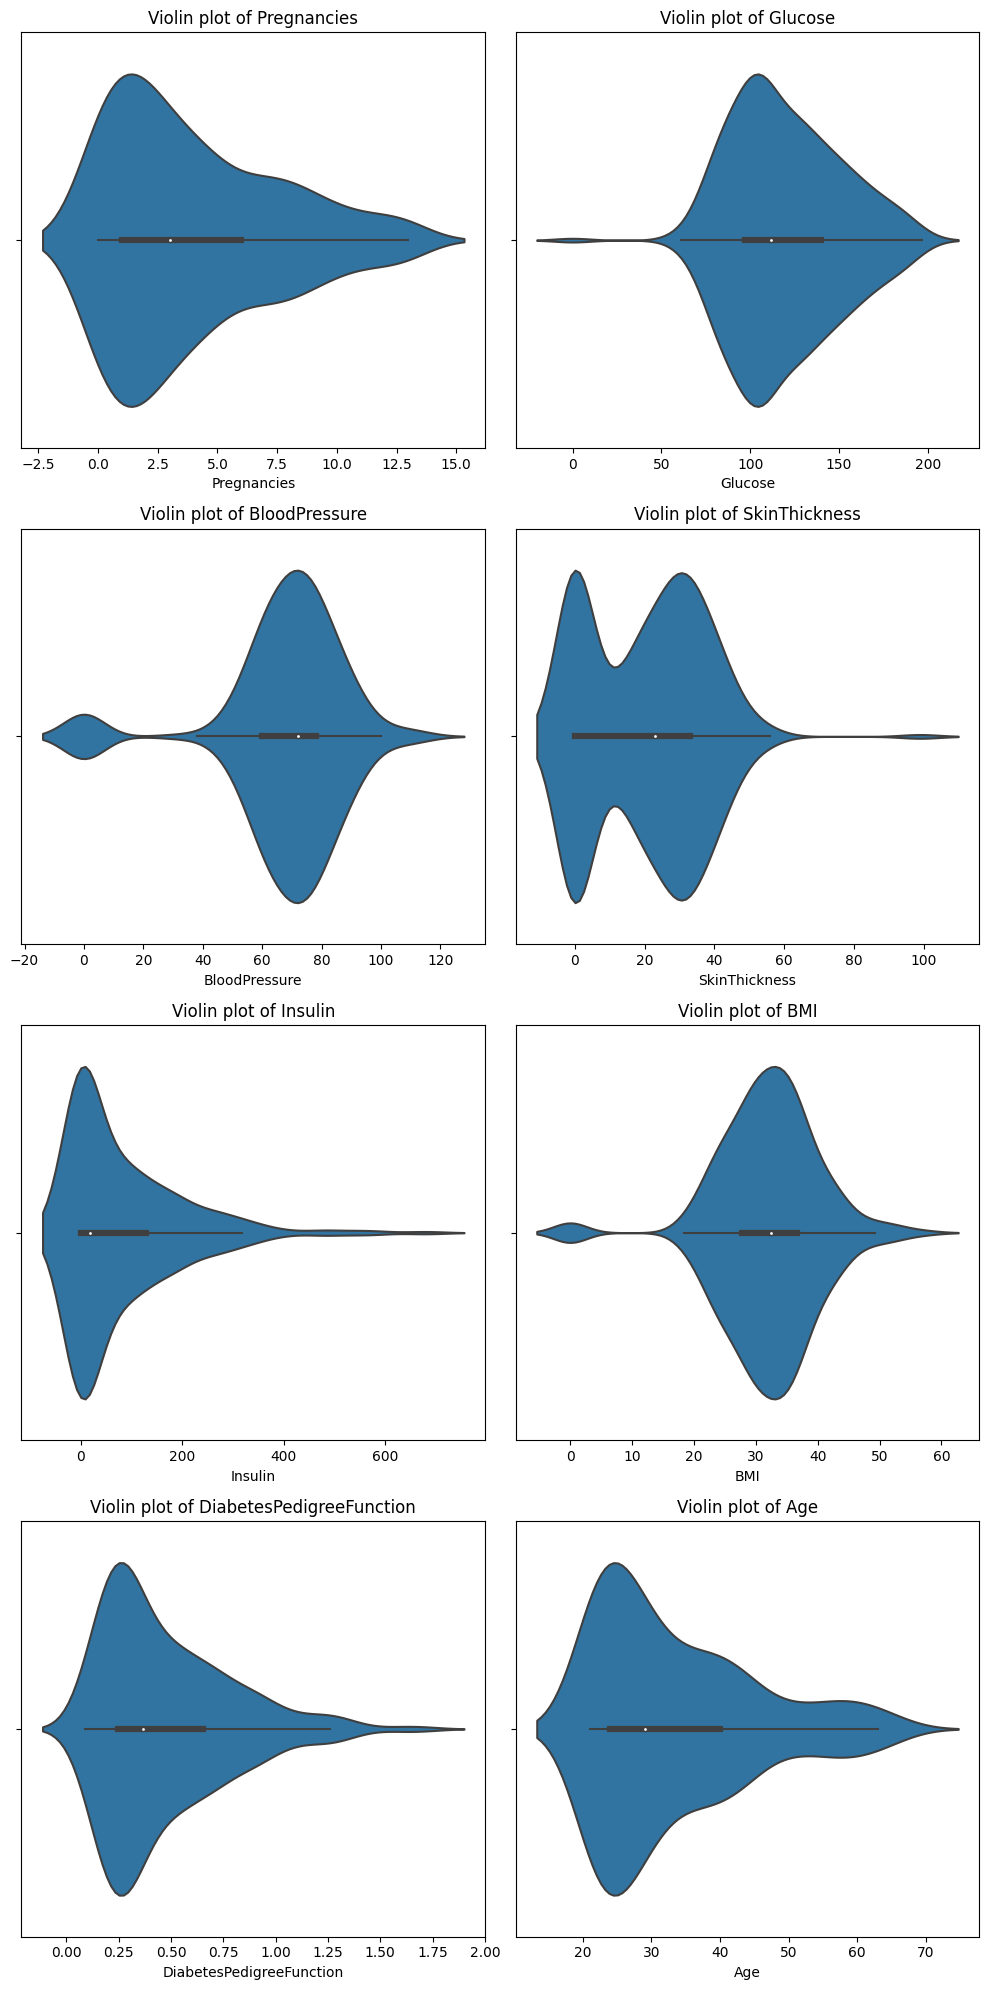

In [12]:
num_columns = len(diabetes.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(diabetes.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=diabetes[column])
    plt.title(f'Violin plot of {column}')

plt.tight_layout()
plt.show()

#Interpretación de los gráficos de las 3 variables más influyentes del dataset

Gráfico de la Glucosa:

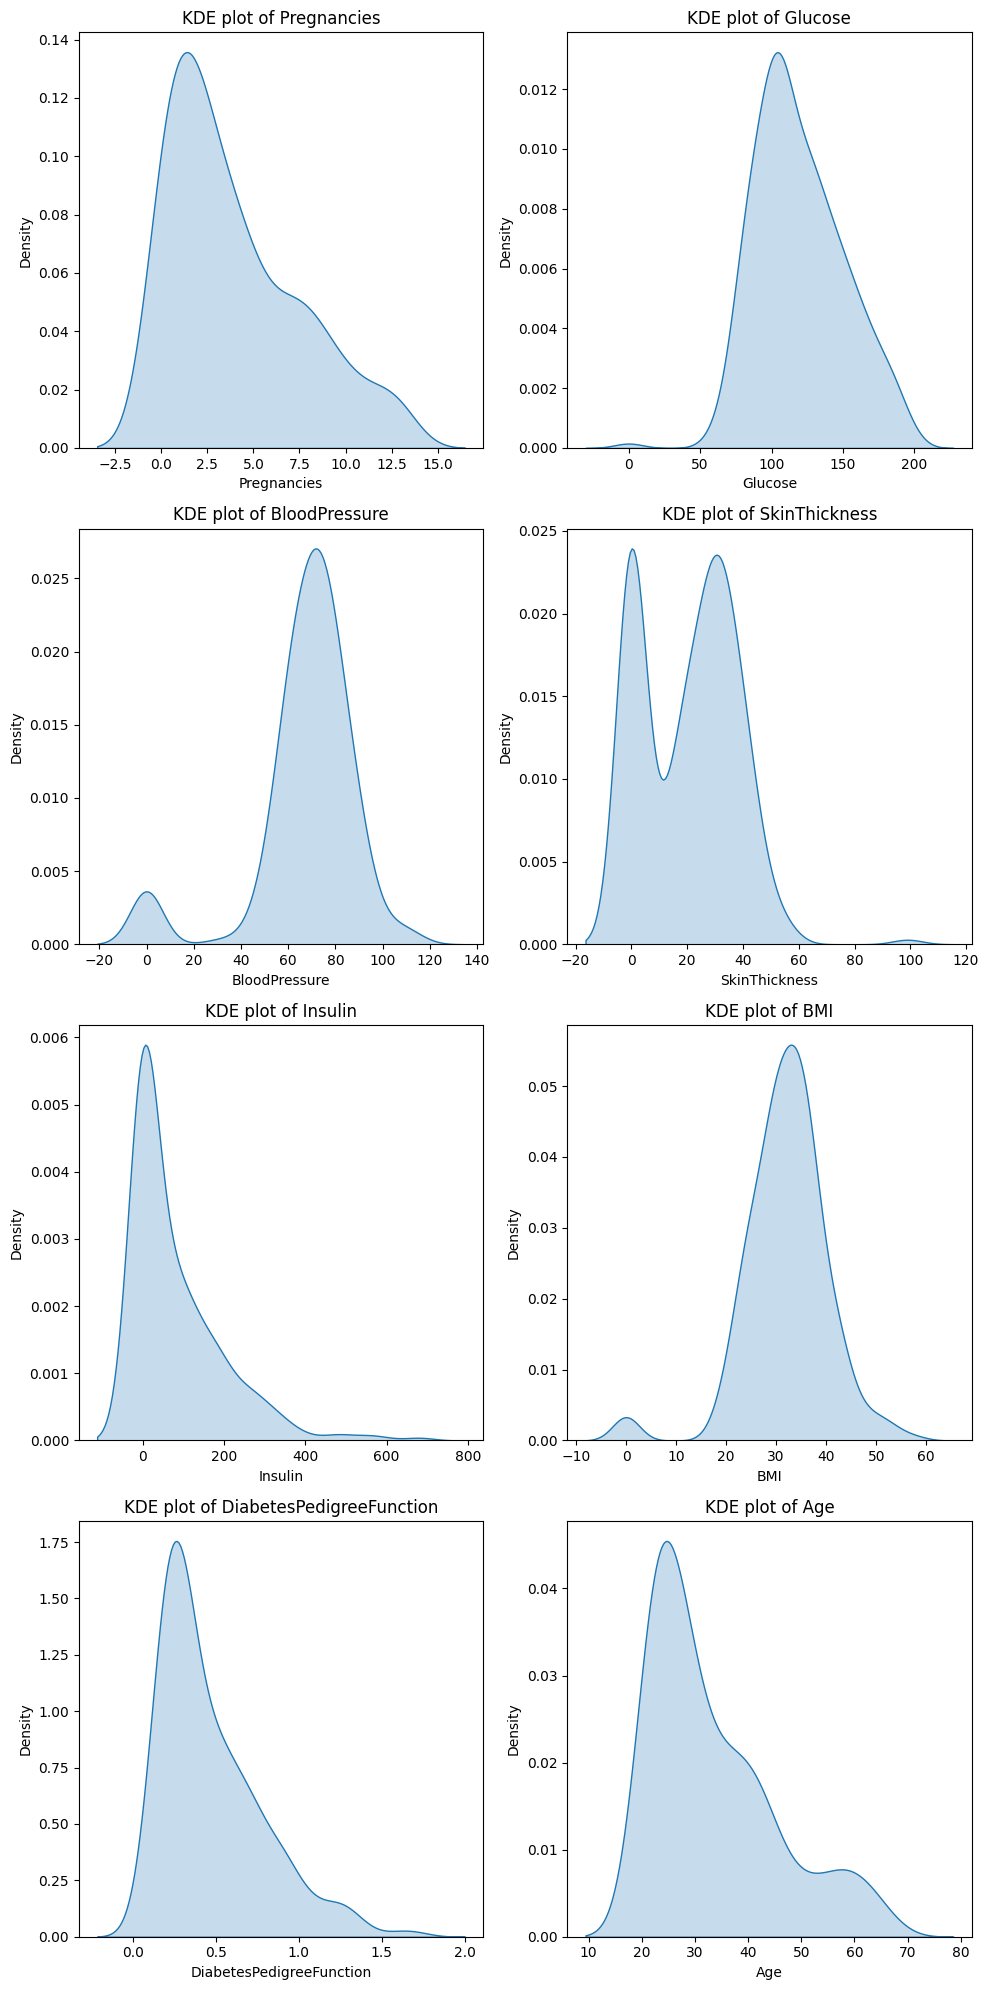

In [13]:
# Kernel Density Estimate (KDE) plots for each variable
num_columns = len(diabetes.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(diabetes.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=diabetes[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

# Interpretación de los gráficos

Gráfico de la Glucosa: El violinplot nos dice que la moda se aproxima a 100 por la derecha. La mediana se aproxima a 110. También veos que hay muchos valores fuera de los rangos intercuantílicos del 25% y 75%, esto se debe a que las personas con Diabetes son valores extremos ya que tienen nivel de glucosa en sangre mucho más alto y también tienen bajones
de azucar. Basicamente se esta tratando con una distribución bimodal dentro de la muestra.

Los valores en cero que se ven en los gráficos  son bastante extraños, ya que si se puede tener un nivel de glucosa bajo en sangre (que se consigue al hacer ayuno) pero es imposible tenerlo en 0, ya que menor que 60 es considerado bajo, por lo que podemos definir que son valores ausentes.


Gráfico del BMI:  El violinplot nos dice que estamos trabajando con personas obesas, ya que el indice de masa corporal tiene una moda superior a 30 y una mediana en 35%. El gráfico se asemeja mucho a una distribución de campana pero se ve afectada por valores ausentes, ya que es imposible tener un BMI de 0%.

Gráfico de la Edad: Este gráfico nos dice que la mediana de 28 años aproximadamente y una moda de 24 a 25. Esta distribución tiene la silueta de una Chi Cuadrada y tiene un rango muy grande da que empieza desde 10 años hasta 77 años.


# Interpretación Bivariante


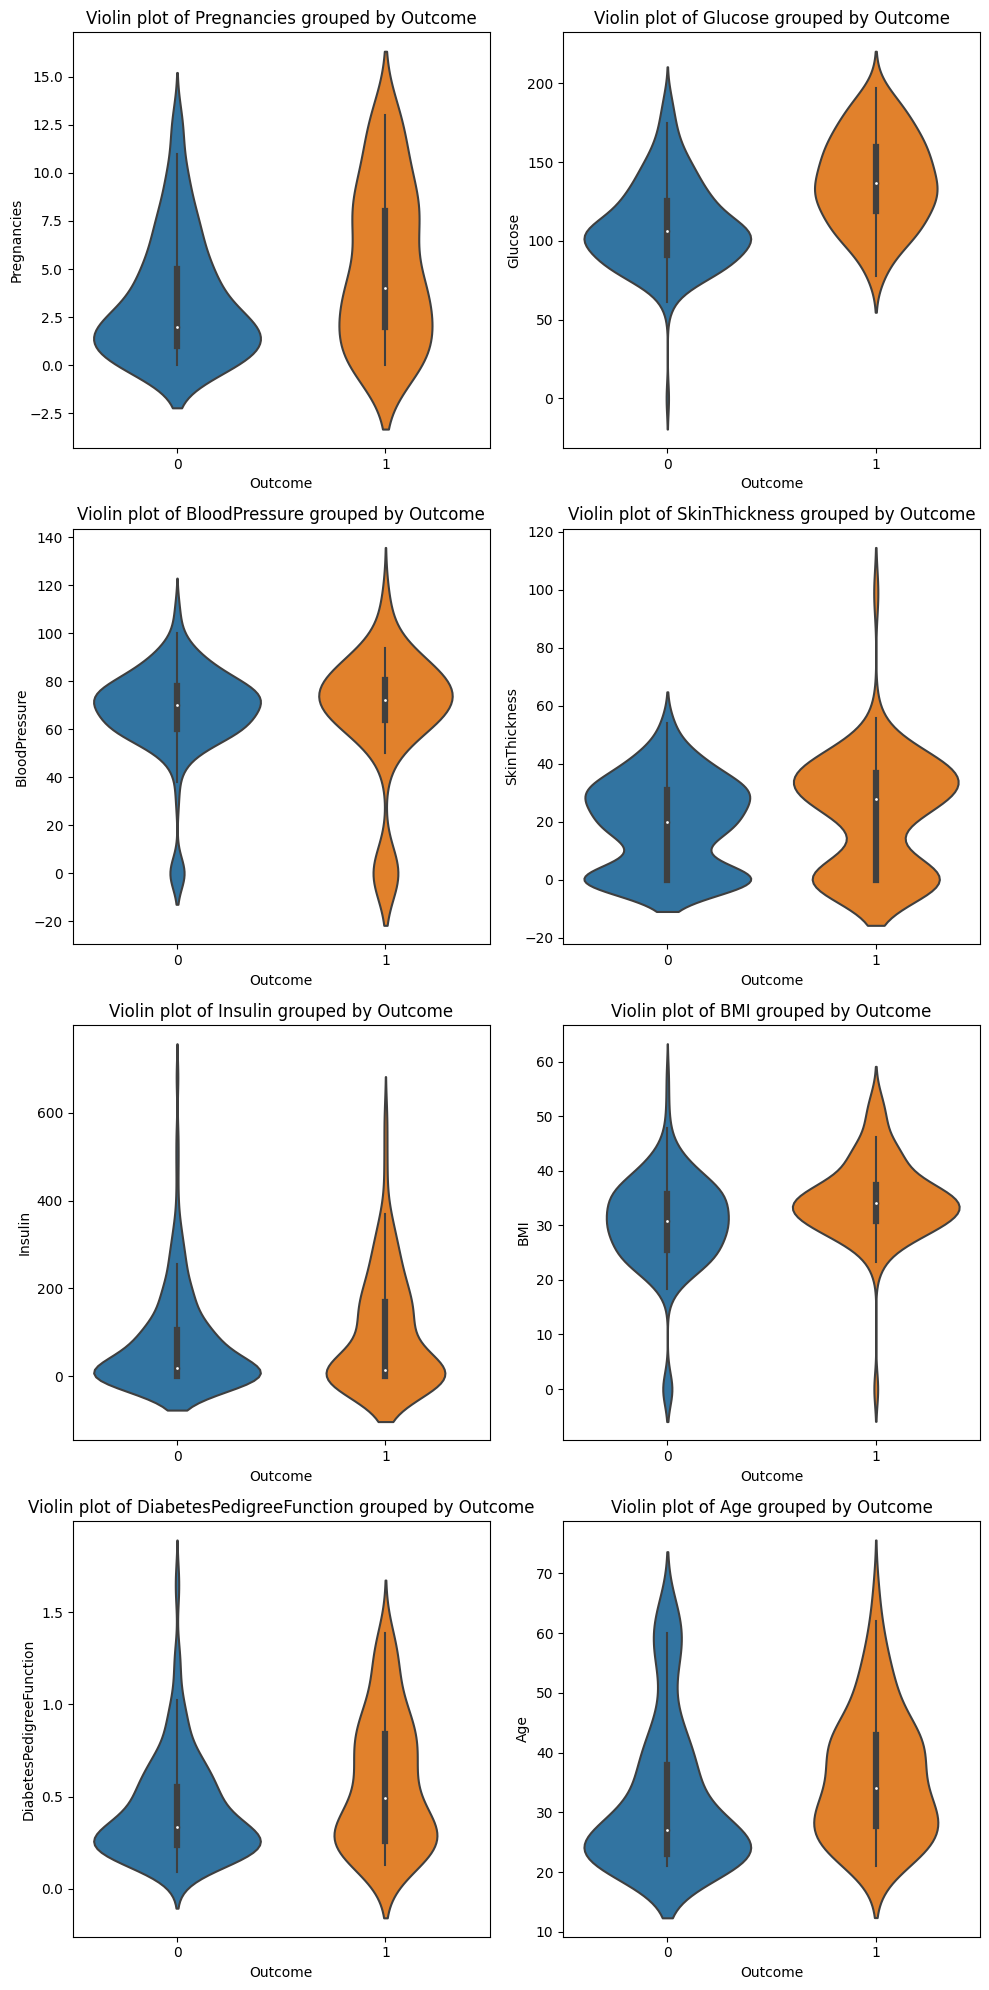

In [14]:

# Violin plots
num_columns = len(diabetes.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(diabetes.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(data=diabetes, x='Outcome', y=column)
    plt.title(f'Violin plot of {column} grouped by Outcome')

plt.tight_layout()
plt.show()

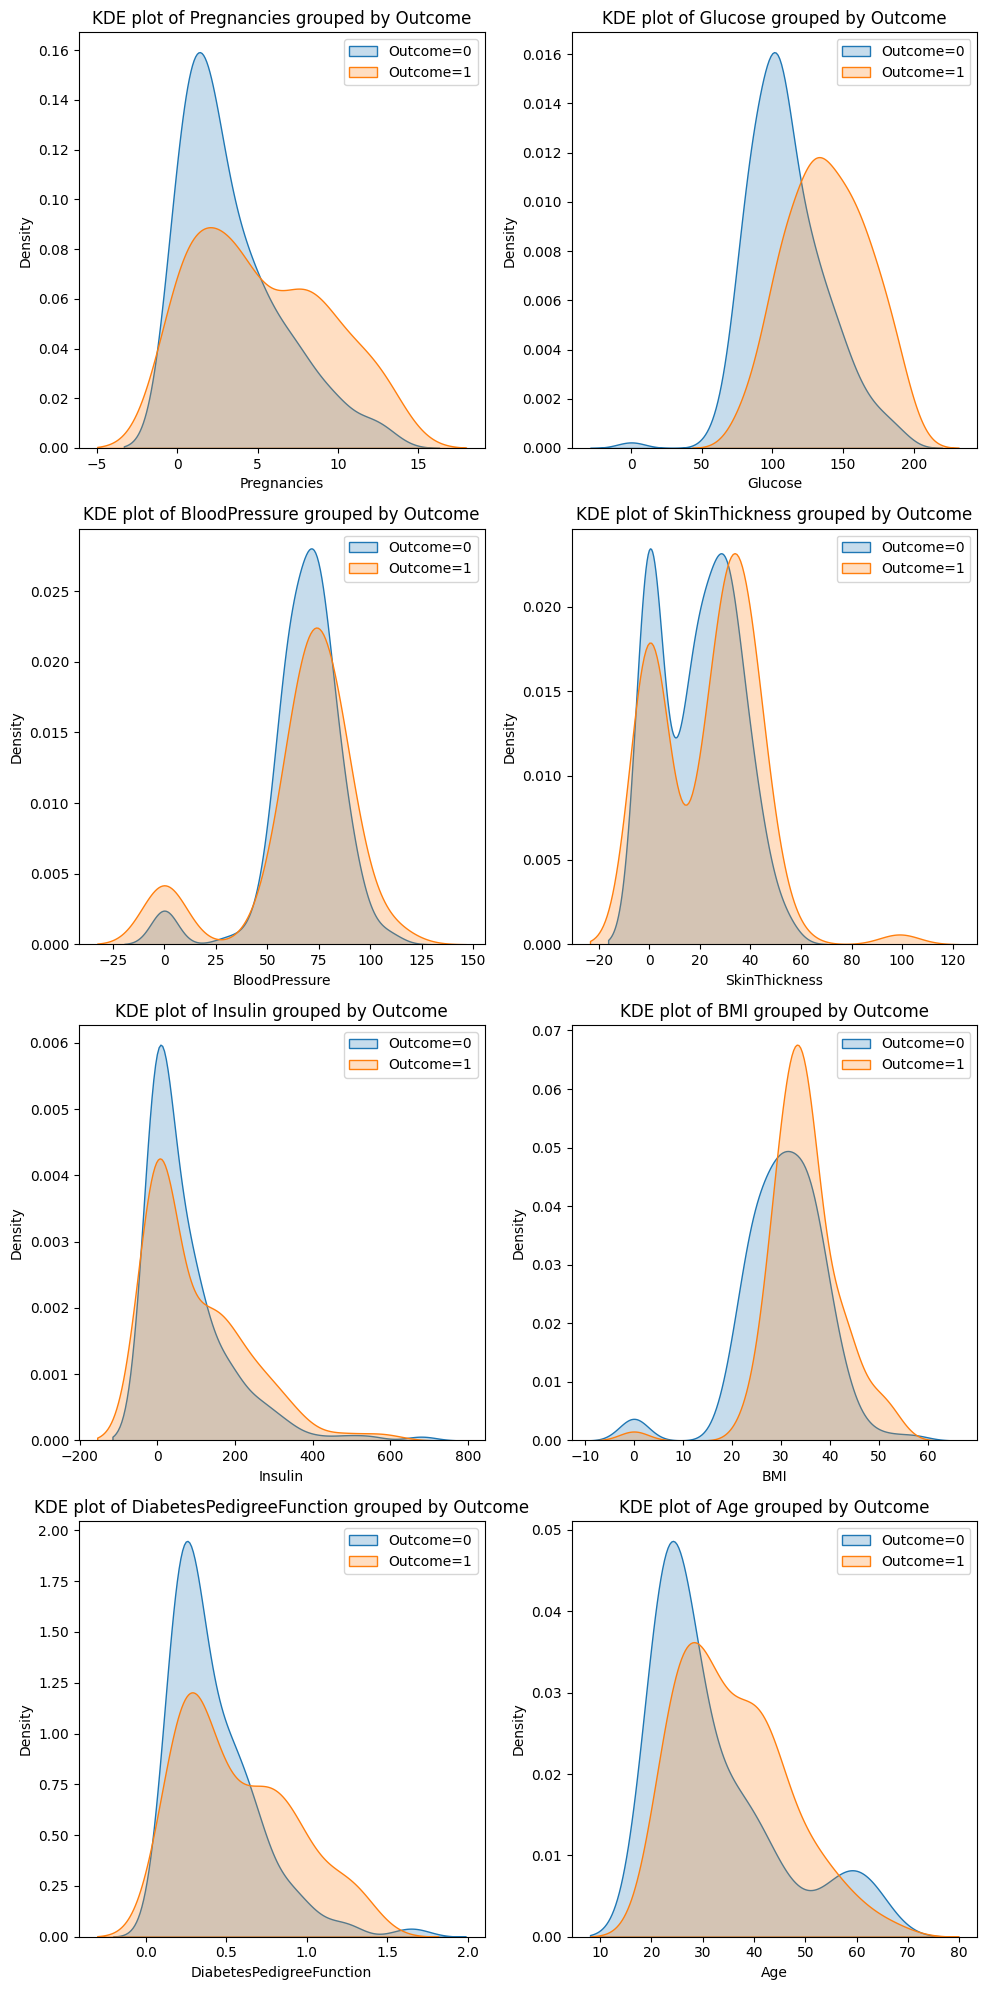

In [15]:

# KDE plots
num_columns = len(diabetes.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(diabetes.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=diabetes[diabetes['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=diabetes[diabetes['Outcome']==1][column], label='Outcome=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()
plt.show()


#Interpretación Bivariante
Como suponiamos en el análisis univariante en los gráficos de glucosa, este dataset tiene dos poblaciones que alteran la distribución de los datos, las personas con diabetes generán una variación en los datos bastante notable. Podemos ver que la diferencia de la moda en glucosa en sangre de las personas sin diabetes es de 100, en cambio en los que si padecen la enfermedad tienen una moda de 125 y los valores de 160Dl siguen estando dentro del RIQ.

#Glucosa vs Diabetes

KDE Glucosa: Podemos ver que la distribución de la gente con diabetes tiene una forma de campana de Gauss casi perfecta. Para las personas que no padecen diabetes, se tienden valores entre 50 a 200, mientras que las personas con la enfermedad rondan entre 50 a 220 y se concentran entre 120 y 160.



#BMI vs Diabetes
Grafico de BMI: ambos grupos tienen distribuciones parecidas solo que la de personas que padecen diabetes está desplazada mas a la derecha, por lo que se puede decir que si tienes diabetes tiendes a padecer mayor grado de obesidad. Ambos grupos se ven afectados por valores nulos ya que nivel de grasa corporal menor a 5& en mujeres es casi imposible. Este gráfico nos dice que las personas en el rango de [10,20]% de grasa corporal son improbables de tener diabetes.

Edad vs Diabetes

Gráfico de Edad: Este gráfico nos dice  que la mayoría de personas que son libres de diabetes tienen entre 17 a 22 años, mientras que las personas que padecen diabetes se encuntran entre los 27 a 31 años. Las personas sanas tiene una distribucion hacia la izquierda, mientras que la de enfermos es mas centrada a la derecha, se puede observar que en la muestra hay mucha más población con diabetes desde los 30 hasta los 50 años, cosa que tiene sentido ya que el hígado se va deteriorando con el pasar del tiempo.

# Estudio Univariante




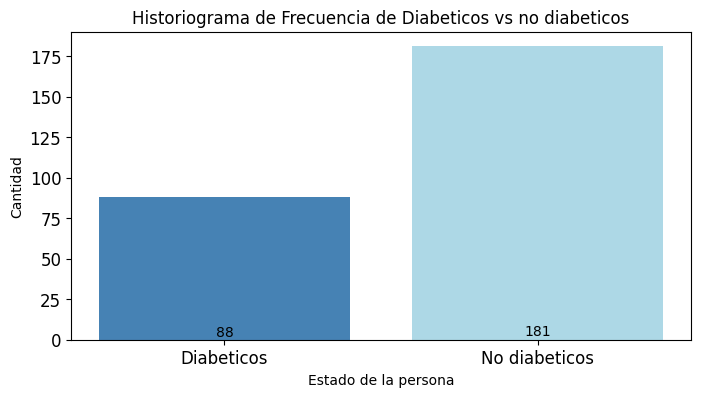

In [16]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Diabeticos vs no diabeticos')
diabeticos = len(diabetes.loc[diabetes['Outcome'] == 1])

Nd = len(diabetes.loc[diabetes['Outcome'] == 0])
total = Nd + diabeticos


plt.bar(['Diabeticos', 'No diabeticos'], [diabeticos, Nd], color=['#4682B4', '#ADD8E6'])
for i, v in enumerate([diabeticos, Nd]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Estado de la persona')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Hay más personas sanas que personas diabéticas en la muestra seleccionada

# Edad vs Diabetes
En está gráfica se buscará la relacion entre la edad vs la salida. Este es un estudio importante, ya que se sabe que a medida que pasa el tiempo los órganos no funcionan de la misma manera.

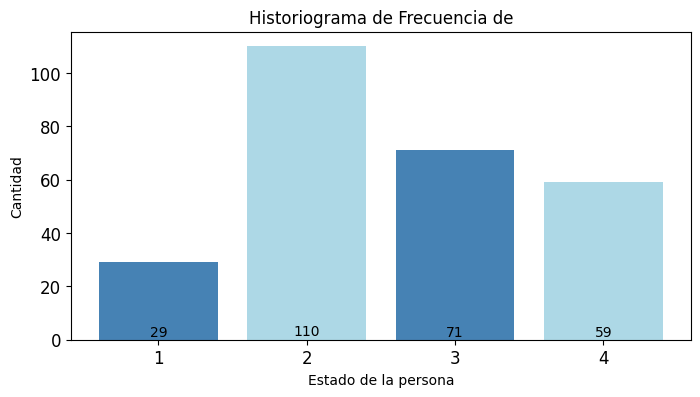

In [17]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de')
diabeticos = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['Age'] <= 29)])
Nd = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['Age'] <= 29)])
NdA = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['Age'] > 29)])
dA = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['Age'] > 29)])

total = 181+ 88
plt.bar(['1', '2','3','4'], [diabeticos, Nd, NdA, dA], color=['#4682B4', '#ADD8E6'])
for i, v in enumerate([diabeticos, Nd, NdA, dA]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Estado de la persona')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Como era de esperar las personas menores igual a 29 años son mucho menos propensas a padecer esta condición, se puede ver una gran diferencia en las barras. Sin embargo después de los 30 años ya las cosas tienen resultados similares, esto puede ser por el declive del cuerpo en esa edad.

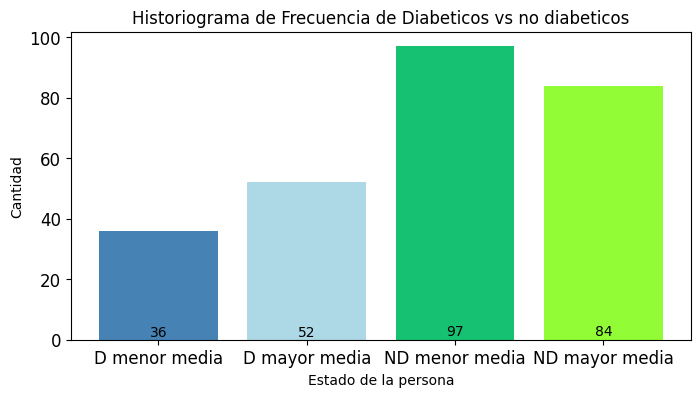

In [18]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Diabeticos vs no diabeticos')
DPFDMen = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['DiabetesPedigreeFunction'] < 0.365)])
DPFDMay = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['DiabetesPedigreeFunction'] >= 0.365)])
NDPFDMen = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['DiabetesPedigreeFunction'] < 0.365)])
NDPFDMay = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['DiabetesPedigreeFunction'] >= 0.365)])

total = NDPFDMay + NDPFDMen + DPFDMay + DPFDMen


plt.bar(['D menor media', 'D mayor media', 'ND menor media','ND mayor media'], [DPFDMen,DPFDMay, NDPFDMen, NDPFDMay], color=['#4682B4', '#ADD8E6', '#16C172','#92fc36'])
for i, v in enumerate([DPFDMen, DPFDMay, NDPFDMen, NDPFDMay]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Estado de la persona')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

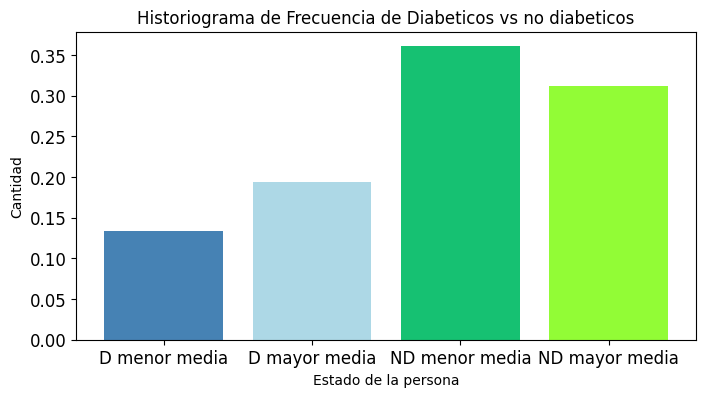

In [19]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Diabeticos vs no diabeticos')
DPFDMen = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['DiabetesPedigreeFunction'] < 0.365)])
DPFDMay = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['DiabetesPedigreeFunction'] >= 0.365)])
NDPFDMen = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['DiabetesPedigreeFunction'] < 0.365)])
NDPFDMay = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['DiabetesPedigreeFunction'] >= 0.365)])

total = NDPFDMay + NDPFDMen + DPFDMay + DPFDMen

plt.bar(['D menor media', 'D mayor media', 'ND menor media','ND mayor media'], [DPFDMen/total,DPFDMay/total, NDPFDMen/total, NDPFDMay/total], color=['#4682B4', '#ADD8E6', '#16C172','#92fc36'])

plt.xlabel('Estado de la persona')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Hasta un punto la genética no es tan importante para definir si tienes o no diabetes

# Estudio sobre la genética y el nivel de glucosa

En la siguiente grafica se están buscando las probabilidades para de tener Diabetes según la genética y el nivel de glucosa en sangre. En este gráfico se están categorizando las personas sin la enfermedad y se están agrupando en 4 grupos: personas con mayor a la mediana en la funcion de Diabetes x genética y glucosa mayor a la mediana, personas con >= a la mediana en la funcion de Diabetes x genética y glucosa < a la mediana. Personas con < a la medianana en la funcion de Diabetes x genética y glucosa < a la medianana y Personas con < a la mediana en la funcion de Diabetes x genética y glucosa >= a la medianana.

Se usa la mediana porque ambas distribuciones están sesgadas y tienen valores outliers.

#Grupo Diabéticos


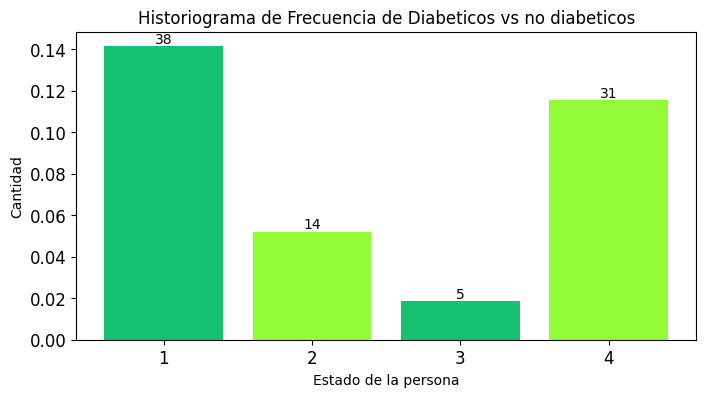

In [20]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Diabeticos vs no diabeticos')

DiabetesGen = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['DiabetesPedigreeFunction'] >= 0.365) & (diabetes['Glucose'] >= 112)])
DiabetesGenNGluc = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['DiabetesPedigreeFunction'] >= 0.365) & (diabetes['Glucose'] < 112)])
DiabetesNGen = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['DiabetesPedigreeFunction'] < 0.365) & (diabetes['Glucose'] < 112)])
DiabetesNGenGluc = len(diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes['DiabetesPedigreeFunction'] < 0.365) & (diabetes['Glucose'] >= 112)])

total = 181 + 88

plt.bar(['1', '2', '3' , '4'], [DiabetesGen/total, DiabetesGenNGluc/total,DiabetesNGen/total,DiabetesNGenGluc/total ], color=['#16C172','#92fc36'])
for i, v in enumerate([DiabetesGen, DiabetesGenNGluc, DiabetesNGen, DiabetesNGenGluc]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Estado de la persona')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


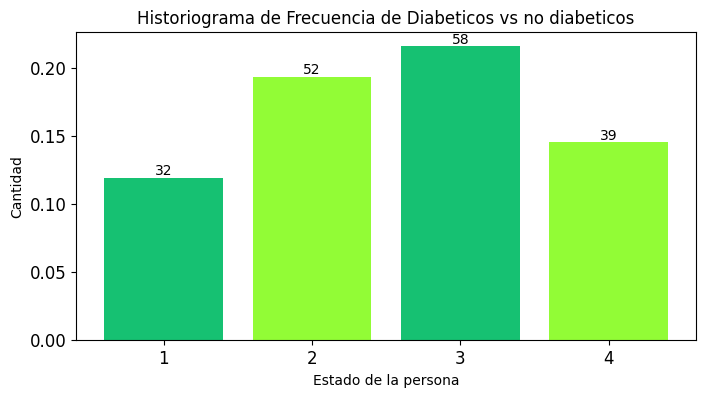

In [21]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de Frecuencia de Diabeticos vs no diabeticos')

DiabetesGen = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['DiabetesPedigreeFunction'] >= 0.365) & (diabetes['Glucose'] >= 112)])
DiabetesGenNGluc = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['DiabetesPedigreeFunction'] >= 0.365) & (diabetes['Glucose'] < 112)])
DiabetesNGen = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['DiabetesPedigreeFunction'] < 0.365) & (diabetes['Glucose'] < 112)])
DiabetesNGenGluc = len(diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes['DiabetesPedigreeFunction'] < 0.365) & (diabetes['Glucose'] >= 112)])

total = 181 + 88

plt.bar(['1', '2', '3' , '4'], [DiabetesGen/total, DiabetesGenNGluc/total,DiabetesNGen/total,DiabetesNGenGluc/total ], color=['#16C172','#92fc36'])
for i, v in enumerate([DiabetesGen, DiabetesGenNGluc, DiabetesNGen, DiabetesNGenGluc]):
    plt.text(i, v/total, str(v), color='black', ha='center', va='bottom')

plt.xlabel('Estado de la persona')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Se puede ver que la probabilidad de tener diabetes si dependiendo de tu genética no es tán significativo como el nivel de glucosa en sangre que es el factor definitivo al definir un resultado. Se llega ha este resultado observando las gráficas de la categorías 2 y 3 que nos permiten observar que si el nivel de glucosa es menor que la mediana de la muestra, tienes muchas menos probabilidades de padecer diabetes.

In [22]:
diabetes['Glucose'].describe()

count    269.000000
mean     119.420074
std       30.856404
min        0.000000
25%       97.000000
50%      112.000000
75%      140.000000
max      197.000000
Name: Glucose, dtype: float64

# Aplicación de la Regresión


In [25]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split



# Obtener los datos (X e y) para la regresión logística binaria
X = diabetes[['BMI', 'Glucose', 'DiabetesPedigreeFunction', 'Pregnancies','BloodPressure']]
y = diabetes['Outcome']



# Agregar una columna de unos a X para el intercepto del modelo
X = sm.add_constant(X)



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Ajustar el modelo de regresión logística binaria con statsmodels
model2 = sm.Logit(y_train, X_train)
result2 = model2.fit()



# Obtener el resumen del modelo
summary2 = result2.summary()



# Imprimir el resumen
print(summary2)

Optimization terminated successfully.
         Current function value: 0.443758
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  215
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.2612
Time:                        05:20:48   Log-Likelihood:                -95.408
converged:                       True   LL-Null:                       -129.15
Covariance Type:            nonrobust   LLR p-value:                 3.425e-13
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.8150      1.223     -5.571      0.000      -9.213

In [26]:
params = result2.params

# Aplicar exponenciación a los coeficientes para interpretarlos

coeficientes_interpretados = np.exp(params)

print(coeficientes_interpretados)

const                       0.001097
BMI                         1.075763
Glucose                     1.031069
DiabetesPedigreeFunction    3.937415
Pregnancies                 1.252434
BloodPressure               0.972606
dtype: float64


# Análisis de la regresión logística

El índice de masa corporal (BMI) aumenta en un 1.07 % más de grasa en las personas con diabetes en comparación con aquellas que no tienen la condición.

Los niveles de glucosa en sangre aumentan en 1.03 DL (decilitros) en las personas con diabetes en comparación con aquellas sin la enfermedad.

La variable de función de pedigree aumenta en 3.93 puntos en aquellos que tienen diabetes en comparación con los que no la tienen.

El número de embarazos aumenta en promedio en uno en las personas con diabetes en comparación con las que no padecen esta condición.

De manera similar, la presión sanguínea también muestra un aumento en aquellos con diabetes en comparación con los individuos sin la enfermedad.





Text(0.5, 1.0, 'Diagrama de dispersion')

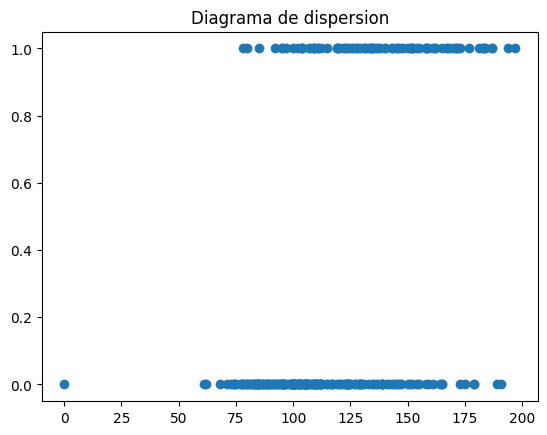

In [30]:
plt.scatter(diabetes['Glucose'], diabetes['Outcome'])

plt.title('Diagrama de dispersion')

Los valores de glucosa para las personas con diabetes tienden a estar más a la derecha que  los valores de las personas que no tienen diabetes.